<div style="text-align:center">
    <img src="https://1000logos.net/wp-content/uploads/2017/06/United-logo.jpg" alt="United Airlines" width="350"/>
</div>


**Notebook Environment and Data Setup**

This notebook has been crafted for use within the Kaggle environment. If you intend to execute this notebook on Kaggle, ensure to upload the datasets that are available in the repository.

However, if you are running this notebook in a different environment, such as Jupyter, feel free to bypass the initial code cell. Instead, import the required files using your usual procedure.


In [ ]:
# !pip install sweetviz
# !pip install pandas-profiling #uncomment to install the package and create the reports on your system.

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from pandas_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/is-inventorydata/is_id.csv
/kaggle/input/united-airlines/Datasets/Inflight Service_Inventory data.csv
/kaggle/input/united-airlines/Datasets/Survey data_Inflight Satisfaction Score.csv
/kaggle/input/united-airlines/Datasets/Inflight Service_Pre order data.csv
/kaggle/input/united-airlines/Datasets/Survey data _Customer comments.csv


In [2]:
# reading Inflight Service_Pre order data.csv
df_is_pod = pd.read_csv('/kaggle/input/united-airlines/Datasets/Inflight Service_Pre order data.csv')

# reading Survey data _Customer comments.csv
df_sd_cc = pd.read_csv('/kaggle/input/united-airlines/Datasets/Survey data _Customer comments.csv')

# reading Inflight Service_Inventory data.csv
df_is_id = pd.read_csv('/kaggle/input/united-airlines/Datasets/Inflight Service_Inventory data.csv')

# reading Survey data_Inflight Satisfaction Score.csv
df_sd_iss = pd.read_csv('/kaggle/input/united-airlines/Datasets/Survey data_Inflight Satisfaction Score.csv')


# Exploring Data with Pandas Profiling and Sweetviz

In this project, we'll use [**pandas_profiling**](https://pandas-profiling.github.io/pandas-profiling/docs/) and [**sweetviz**](https://github.com/fbdesignpro/sweetviz) libraries to create comprehensive data reports and visualizations. These tools offer quick insights into our datasets, helping us understand column characteristics, patterns, and valuable information.

**Pandas Profiling** generates detailed reports from pandas DataFrames with statistics and visualizations, streamlining initial data analysis.

**Sweetviz** generates visual reports for comparison, data distribution analysis, and correlation visualization. It provides quick insights without extensive code.

With these tools, we'll create informative reports to understand our data and make informed decisions for further analysis. Let's explore these libraries in action!


In [9]:
def eda_report(df, dataframe_name):
    output_filename = f'output_{dataframe_name}.html'
    prof = ProfileReport(df)
    prof.to_file(output_file=output_filename)


In [ ]:
# Generating statistics reports for each dataframe
eda_report(df_is_pod, "df_is_pod")
eda_report(df_is_id, "df_is_id")
eda_report(df_sd_cc, "df_sd_cc")
eda_report(df_sd_iss, "df_sd_iss")

In [ ]:
# Generating visualizations reports for each dataframe
report_sd_iss = sv.analyze(df_sd_iss)
report_sd_iss.show_html("viz_report_sd_iss.html")

report_is_id = sv.analyze(df_is_id)
report_is_id.show_html("viz_report_is_id.html")

report_sd_cc = sv.analyze(df_sd_cc)
report_sd_cc.show_html("viz_report_sd_cc.html")

report_is_pod = sv.analyze(df_is_pod)
report_is_pod.show_html("viz_report_is_pod.html")

## Data Cleaning: Removing Duplicate Rows

In this section, we'll start the data cleaning process by removing duplicate rows from the dataset. Duplicate entries can skew analysis results and compromise accuracy.

### Approach

To identify and remove duplicates, we'll use a composite key or primary key. This key consists of specific columns that uniquely define each entry. By focusing on these key columns, we'll ensure that our dataset remains free from redundant information.

Cleaning duplicates is a crucial step towards reliable and accurate analysis. Let's proceed to enhance our data quality by eliminating duplicate rows.


In [8]:
#Function to Remove the duplicated rows in our dataset based on composite key
def rem_duplicates(comp_key,df):
    temp = len(df)
    df = df[~df.duplicated(subset=comp_key, keep='first')]
    
    print(f"Total duplicates removed : {temp - len(df)}")
    return df


In [9]:
#Extracting the composite keys of all the datasets
is_id_primary = df_is_id.columns[:5]
is_pod_primary = df_is_pod.columns[:6]
sd_cc_primary = df_sd_cc.columns[:4]
sd_iss_primary = df_sd_iss.columns[:5]


In [10]:
# cleaned dataframes

df_is_id = rem_duplicates(is_id_primary,df_is_id)
df_is_pod = rem_duplicates(is_pod_primary,df_is_pod)
df_sd_cc = rem_duplicates(sd_cc_primary,df_sd_cc)
df_sd_iss = rem_duplicates(sd_iss_primary,df_sd_iss)


Total duplicates removed : 3
Total duplicates removed : 41315
Total duplicates removed : 852
Total duplicates removed : 12218


## Handling Missing Values

In this section, we'll delve into the examination of missing values within each column of our dataset. Our goal is to assess the extent of missing data and determine appropriate actions to address them effectively.

### Approach

By analyzing the distribution of missing values in our dataset's columns, we'll be equipped to make informed decisions on how to handle them. Depending on the context, we might opt to remove rows with missing values, fill them with appropriate values, or explore other strategies that best suit our analysis goals.

Examining and addressing missing values is a crucial step to ensure the reliability and accuracy of our data analysis. Let's proceed to evaluate the missing values and devise suitable strategies to handle them.


In [16]:
df_is_id.isna().sum()

In [32]:
# print(df_is_pod.isna().sum())

# We observe that meal_group, meal_category and is_entree all have 20311 missing values indicating all of them
#are connected, and 'meal descrpition' has 74977 null values because not all food items has long description
#therefore since the dataset is about all pre ordered items, I'll remove those rows where 'pre_order_qty'==0

df_is_pod = df_is_pod[df_is_pod['pre_order_qty'] != 0]
df_is_pod.shape[0]
#213039-193595 = 19444 rows has been removed


flight_number                  0
departure_station_code         0
arrival_station_code           0
record_locator                 0
carrier_code                   0
scheduled_departure_dtl        0
cabin_code                     0
meal_group                 20311
meal_category              20311
meal_short_description         0
meal_description           74977
is_entree                  20311
pre_order_qty                  0
dtype: int64


193595

In [35]:
df_sd_cc.isna().sum()
# 'loyalty_program_level' has 2504 empty values, by cross checking we see that those indicate passengers,
# not having the membership of the loyalty program

In [37]:
df_sd_iss.isna().sum()
print(f'Total rows before {df_sd_iss.shape[0]}')
### what rows to remove ###

df_sd_iss = df_sd_iss[(~df_sd_iss['departure_gate'].isna()) & (~df_sd_iss['arrival_gate'].isna())]
print(f'Total rows after {df_sd_iss.shape[0]}')
#means no departure or arrival gate was mentioned

### what not to remove###

# 1. satisfaction type : 12111 missing values
#     because a 2nd question was asked 'What item did you choose?', which has no relation to 'satisfaction type'

# 2. cabin_name : 19980 na values
#     bc, this describes what type of economy class is there

# 3. loyalty_program_level : 11616 na val
#     again the same reason as survey data customer comments sheet

# 4. media provider : 1539
#     wasn't covered in media outlet

Total rows before 47074
Total rows after 46451


## Analyzing Inflight Service Inventory Data

We've filtered the CSV file named 'Inflight Service Inventory Data' to include a new column indicating the class of food. Our objective is to uncover insights by examining food items and their behavior in relation to ratings. 

### Approach

By introducing the class of food and studying its patterns, we aim to discover correlations between different food categories and the provided ratings. This analysis will shed light on how various classes of food influence passenger perceptions and satisfaction.



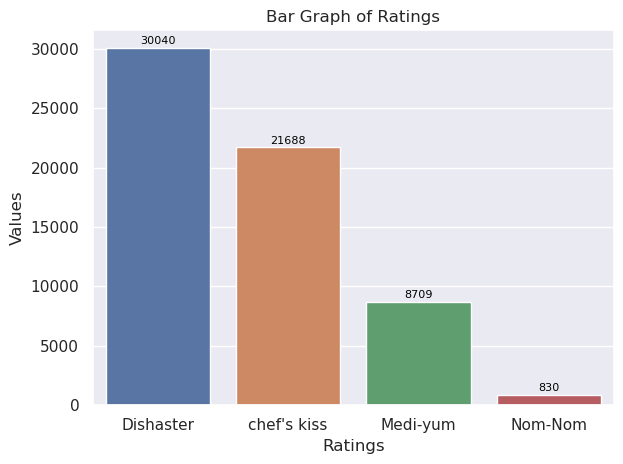

In [86]:
#filtered csv file 'inflight service inventory data' where the class of food has been added
# plan of action is to identify the foods and thier patterns towards this behaviour

df_exp = pd.read_csv('/kaggle/input/is-inventorydata/is_id.csv')
ser = df_exp['consumption'].value_counts()

ax = sns.barplot(x=ser.index, y=ser.values)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=8,  # Adjusting the font size
                    color='black')  # Adjusting the font color

# Customize the plot
plt.xlabel('Ratings')
plt.ylabel('Values')
plt.title('Bar Graph of Ratings')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:

sns.barplot(x=series.index, y=series.values)

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph of Pandas Series')

# Display the plot
plt.tight_layout()
plt.show()


In [87]:
#seeing the distribuiton of my rating vs entree codes or A to B mapping


def rating_vs_codes(rating,df):
    series = df[df['consumption']==rating]['entree_code'].value_counts()

    sns.set_theme()
#     sns.barplot(x=series.index, y=series.values, palette=sns.color_palette("colorblind"))
    ax = sns.barplot(x=series.index, y=series.values, palette=sns.color_palette("colorblind"))

    for p in ax.patches:
        ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=8,  # Adjusting the font size
                    color='black')  # Adjusting the font color
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title(f'Bar Graph for rating : {rating}')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

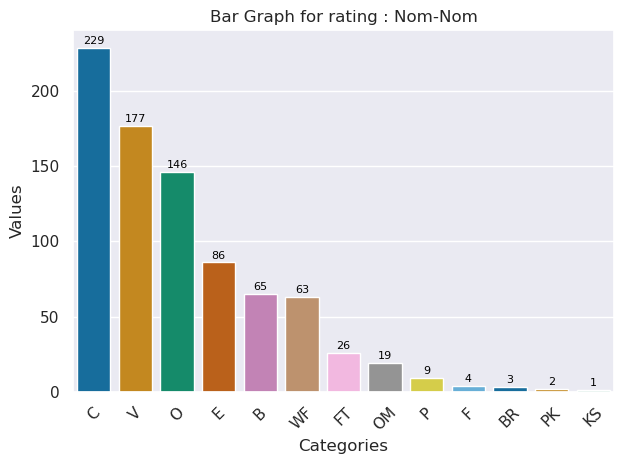

In [88]:
rating_vs_codes('Nom-Nom',df_exp)

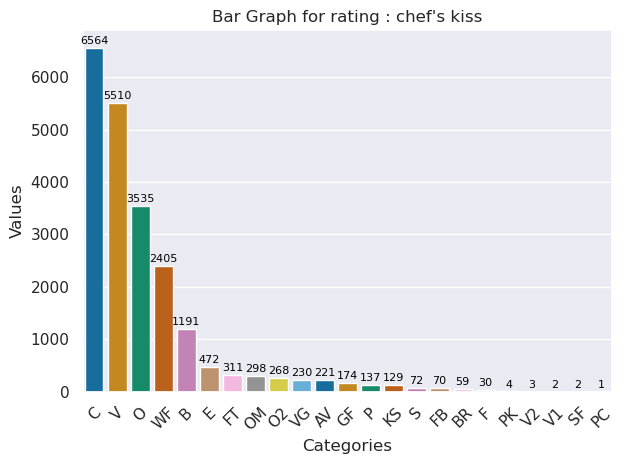

In [89]:
rating_vs_codes("chef's kiss",df_exp)

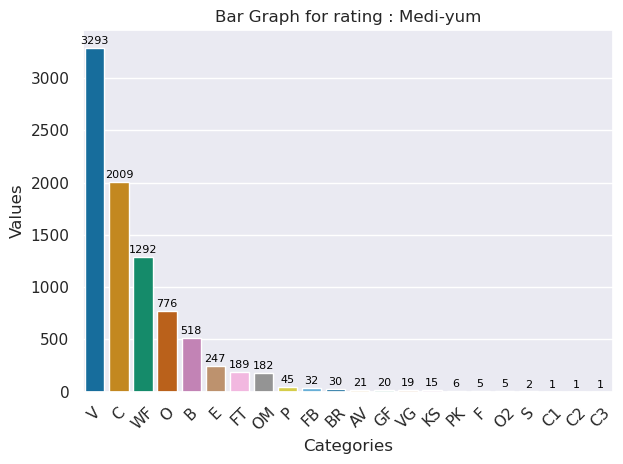

In [90]:
rating_vs_codes("Medi-yum",df_exp)

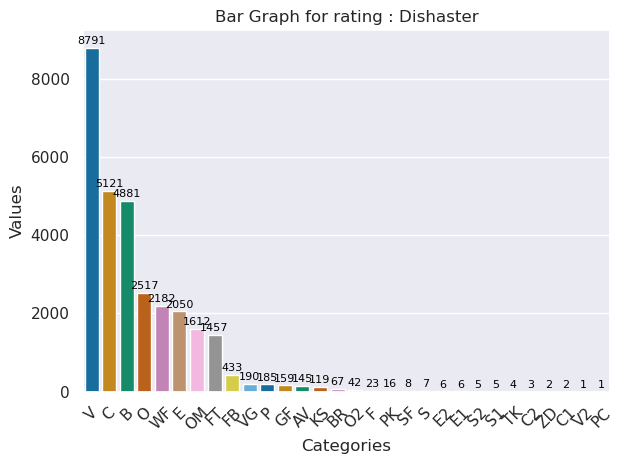

In [91]:
rating_vs_codes("Dishaster",df_exp)

In [107]:
# class V and C appear alomost ecxlusively in all ratings, gotta investigate further:

#checking for dishaster(no one ate that food) rating and the dishes that appear in the most hated entree i.e; entree_code='V'

consumption_mask = df_exp['consumption'] == 'Dishaster'
entree_mask = df_exp['entree_code'] == 'V'
result = df_exp[consumption_mask & entree_mask]

#most hated dishes that no one ate
most_hated = result['entree_description'].unique().tolist()

result['entree_description'].value_counts()


Impossible Meatball Bowl                                                        4754
Vegetarian chili and polenta cake                                               2226
Mediterranean Falafel Bowl                                                      1412
Vegetarian entree                                                                221
Crispy Hawaiian garlic tofu                                                      141
Butternut squash schnitzel                                                        29
Pearl couscous                                                                     6
Seven vegetable stir-fry                                                           1
ENT, YELLOW THAI VEGETABLE CURRY - NON-WESTERN VEGETARIAN, UE, EUROPE to USA       1
Name: entree_description, dtype: int64

In [126]:

#checking for chef's kiss(total consumed > supply/2) rating and the dishes that appear in the most loved entree i.e; entree_code='C'

consumption_mask = df_exp['consumption'] == "chef's kiss"
entree_mask = df_exp['entree_code'] == 'C'
result = df_exp[consumption_mask & entree_mask]

#most loved dishes
most_loved = result['entree_description'].unique().tolist()
result['entree_description'].value_counts()

Zatar chicken                                                    5915
Chicken breast entree                                             311
Thai chicken                                                      128
Grilled chicken                                                   112
Chicken katsu                                                      40
Teriyaki chicken                                                   22
Roasted chicken                                                    15
Grilled chicken breast                                             10
Chicken breast stuffed with mozzarella and sun-dried tomatoes       5
Chicken roulade                                                     4
Chicken tikka masala                                                1
Chicken chorizo-sausage shakshuka,                                  1
Name: entree_description, dtype: int64

In [129]:
# seeking why some people have a love-hate relationship with food from entree_code class 'V'

consumption_mask = df_exp['consumption'] == "chef's kiss"
entree_mask = df_exp['entree_code'] == 'V'
result = df_exp[consumption_mask & entree_mask]

print(result['entree_description'].value_counts())
somewhat_eatable=result['entree_description'].unique().tolist()

#answer is complex and could be based upon the liking, veg-non-vegetarian choices, day, etc
#ex = 'Impossible Meatball Bowl' like-dislike ratio is 4563:4754 = 0.95
#while very less people actually enjoy 'Vegetarian chili and polenta cake' 344/2226 = 0.15

# Absolutely hated items that no one even touches
#needs more working, still a abstract idea******************
Absolutely_hated = [element for element in most_hated if element not in somewhat_eatable]
print()
print('NO ONE EATS THEM, REMOVE THESE ITEMS FROM THE MENU :')

for item in Absolutely_hated:
    print(item)


Impossible Meatball Bowl             4563
Vegetarian chili and polenta cake     344
Vegetarian entree                     253
Mediterranean Falafel Bowl            213
Crispy Hawaiian garlic tofu            98
Butternut squash schnitzel             39
Name: entree_description, dtype: int64

NO ONE EATS THEM, REMOVE THESE ITEMS FROM THE MENU :
Pearl couscous
Seven vegetable stir-fry
ENT, YELLOW THAI VEGETABLE CURRY - NON-WESTERN VEGETARIAN, UE, EUROPE to USA


In [121]:
# similary some people also have a love-hate relationship with "C" class foods
#needs more work

consumption_mask = df_exp['consumption'] == 'Dishaster'
entree_mask = df_exp['entree_code'] == 'C'
result = df_exp[consumption_mask & entree_mask]

result['entree_description'].value_counts()

#answer is the liking is very small, a small percent of people only likes these foods when compared with the 
#masses
#ex = 'Impossible Meatball Bowl' like-dislike ratio is 146:4754 = 0.03 or 3 percent

Zatar chicken                                                                         4555
Chicken breast entree                                                                  215
Thai chicken                                                                           139
Grilled chicken                                                                         86
Chicken katsu                                                                           51
Teriyaki chicken                                                                        24
Grilled chicken breast                                                                  14
Chicken breast stuffed with mozzarella and sun-dried tomatoes                            8
Roasted chicken                                                                          6
Chicken roulade                                                                          5
Chicken Entree on Cycle                                                                  4

In [ ]:
#further items can also be discarded from a code/group, it is not always true that all items from any 
#class will always be liked
#example some items from C can be removed, that's for the future task